# Nội dung
## 1.   Giới thiệu
  
Trong bài đánh giá này, tôi đánh giá hiệu suất của các mô hình đoán mật khẩu hiện đại, bao gồm PassGAN, GNPassGAN, PassFlow, và PassGPT. Tôi sẽ thực hiện các thử nghiệm trên nhiều bộ dữ liệu khác nhau và sử dụng các kỹ thuật tấn công mật khẩu phổ biến như trawling attack và hybrid attack để đánh giá hiệu quả của từng mô hình.

Thư viện sử dụng trong bài đánh giá này:

In [15]:
pip install matplotlib==3.6.3

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

## 2.   Các mô hình sử dụng trong đánh giá
### *   PassGAN
PassGAN (Password Generative Adversarial Network) là một trong những mô hình đầu tiên ứng dụng GAN (Generative Adversarial Network) vào việc tạo mật khẩu. Nó sử dụng một mạng sinh (Generator) để tạo ra mật khẩu mới và một mạng phân biệt (Discriminator) để đánh giá mức độ chân thực của mật khẩu đó. Mô hình này có thể học được quy luật phân phối mật khẩu từ tập dữ liệu thực tế, giúp tạo ra các mật khẩu giống với những gì người dùng thường sử dụng.

In [23]:
with open("PassGAN\gen_passwords.txt", "r", encoding="utf-8") as file:
    GAN_pass = [line.strip() for line in file]
print("Độ dài bộ sinh của PassGAN: " + str(len(GAN_pass)))
print(GAN_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ sinh của PassGAN: 100
['marcale3', 'mamilie76', 'tatoiro', 'sheddo', 'babyoud10', 'thsdows', 'diago1', '275163', 'suga10', '123456k']


### *   GNPassGAN
GNPassGAN là phiên bản cải tiến của PassGAN, trong đó GN (Guided Noise) giúp hướng dẫn quá trình sinh mật khẩu bằng cách thêm thông tin ràng buộc vào quá trình học. Thay vì chỉ dựa vào GAN để sinh mật khẩu ngẫu nhiên, GNPassGAN sử dụng một số thông tin có cấu trúc để đảm bảo mật khẩu sinh ra có đặc điểm phù hợp với mật khẩu thực tế.

In [24]:
with open("GNPassGAN\generated\sample.txt", "r", encoding="utf-8") as file:
    GNGAN_pass = [line.strip() for line in file]
print("Độ dài bộ sinh của GNPassGAN: " + str(len(GNGAN_pass)))
print(GNGAN_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ sinh của GNPassGAN: 100
['nin0910177', 'chariaaliza', '45911765', '48232a2939', '23302120', 'boblsir', '2106861', '891050584', '01222505', '79892400']


### *   Omen
Omen là một mô hình dựa trên Markov Chain, trong đó mật khẩu được sinh ra dựa trên xác suất của các ký tự kế tiếp nhau. Mô hình này học từ tập dữ liệu mật khẩu thực tế để xác định các chuỗi ký tự có khả năng xuất hiện cao nhất.

In [25]:
with open("Markov-Omen\pass.txt", "r", encoding="utf-8") as file:
    Omen_pass = [line.strip() for line in file]
print("Độ dài bộ sinh của Omen: " + str(len(Omen_pass)))
print(Omen_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ sinh của Omen: 100
['cristo', 'cristy', '042424', 'sonico', 'sonick', 'son200', 'son111', 'son112', 'son110', 'son131']


### * PassGPT
PassGPT là một mô hình dựa trên Transformer, cụ thể là kiến trúc GPT (Generative Pre-trained Transformer), để sinh mật khẩu có tính chân thực cao. Mô hình này học cách dự đoán và sinh ra từng ký tự trong mật khẩu dựa trên ngữ cảnh của các ký tự trước đó. Nó có thể học được các quy tắc phức tạp hơn so với Markov hay GAN.

In [26]:
with open("PassGPT//configs//rockyoumini.txt", "r", encoding="utf-8") as file:
    PassGPT_pass = [line.strip() for line in file]
print("Độ dài bộ sinh của PassGPT: " + str(len(PassGPT_pass)))
print(PassGPT_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ sinh của PassGPT: 100
['123456', '12345', '123456789', 'password', 'iloveyou', 'princess', '1234567', 'rockyou', '12345678', 'abc123']


## 3. Các bộ dữ liệu kiểm tra
### * Rockyou
Bộ dữ liệu Rockyou chứa hàng triệu mật khẩu thực tế bị rò rỉ từ các tài khoản bị xâm nhập. Đây là một trong những bộ dữ liệu phổ biến nhất để huấn luyện và kiểm tra các mô hình đoán mật khẩu.

In [27]:
with open("Dataset\Rockyou.txt", "r", encoding="utf-8") as file:
    rockyou_pass = [line.strip() for line in file]
print("Độ dài bộ dữ liệu rockyou: " + str(len(rockyou_pass)))
print(rockyou_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ dữ liệu rockyou: 272
['burlock1', '15kongro', 'lutawin2003', 'STARR23', 'ilovetony93', 'louphips', 'fuckidy', '23122527', 'walmart78', 'DIPTHAT!']


### * Lindked
Bộ dữ liệu LinkedIn gồm các mật khẩu bị lộ từ sự cố bảo mật của LinkedIn. Dữ liệu này phản ánh mật khẩu thực tế của người dùng trên mạng xã hội.

In [28]:
with open("Dataset\Lindked.txt", "r", encoding="utf-8") as file:
    lindked_pass = [line.strip() for line in file]
print("Độ dài bộ dữ liệu Lindked: " + str(len(lindked_pass)))
print(lindked_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ dữ liệu Lindked: 49
['123456', 'linkedin', 'password', '123456789', '12345678', '111111', '1234567', 'sunshine', 'qwerty', '654321']


### * Yahoo
Bộ dữ liệu Yahoo chứa mật khẩu từ một vụ rò rỉ lớn của Yahoo, giúp đánh giá hiệu suất của mô hình trên các tài khoản email.

In [29]:
with open("Dataset\Yahoo.txt", "r", encoding="utf-8") as file:
    yahoo_pass = [line.strip() for line in file]
print("Độ dài bộ dữ liệu Yahoo: " + str(len(yahoo_pass)))
print(yahoo_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ dữ liệu Yahoo: 236
['corvette', 'hello', 'martin', 'heather', 'secret', 'fucker', 'merlin', 'diamond', '1234qwer', 'gfhjkm']


### * Facebook
Bộ dữ liệu Facebook chứa thông tin mật khẩu bị rò rỉ từ nền tảng này, hỗ trợ kiểm tra khả năng đoán mật khẩu của các mô hình trên dữ liệu mạng xã hội.

In [3]:
with open("Dataset\Facebook.txt", "r", encoding="utf-8") as file:
    facebook_pass = [line.strip() for line in file]
print("Độ dài bộ dữ liệu Facebook: " + str(len(facebook_pass)))
print(facebook_pass[:10])  # In thử 10 mật khẩu đầu tiên

Độ dài bộ dữ liệu Facebook: 93
['1234567', 'dragon', '123123', 'baseball', 'abc123', 'football', 'monkey', 'letmein', '696969', 'shadow']


## 4. Kỹ thuật Password attack sử dụng bộ từ điển
### * Trawling attack
Trawling attack là kỹ thuật tạo ra một danh sách mật khẩu phổ biến và thử chúng trên một số lượng lớn tài khoản. Mục tiêu của phương pháp này là khai thác những mật khẩu phổ biến mà nhiều người sử dụng.

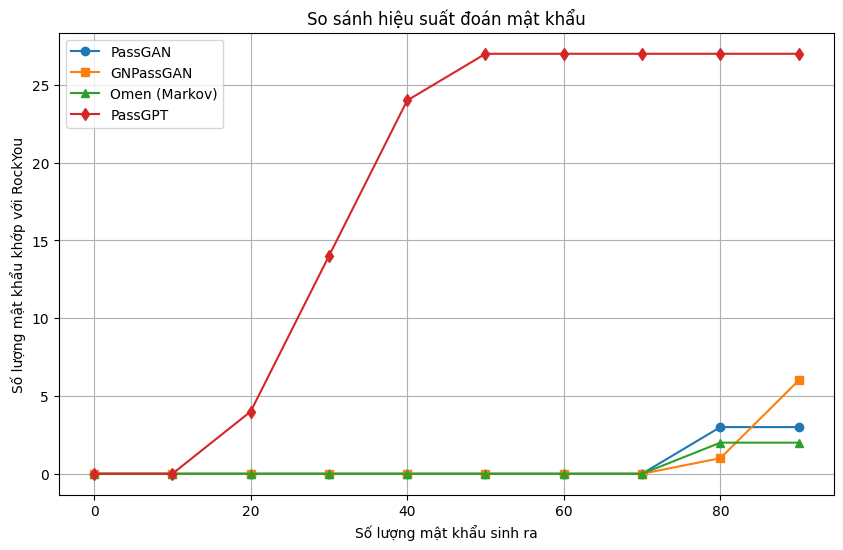

In [31]:
# Hàm tính số mật khẩu khớp với RockYou theo từng khúc
def match_count(passwords, rockyou_set, chunk_size=10):
    matches = []
    total_matches = 0
    for i in range(0, len(passwords), chunk_size):
        chunk = passwords[i:i+chunk_size]
        matched = sum(1 for pw in chunk if pw in rockyou_set)
        total_matches += matched
        matches.append(total_matches)
    return matches

# Chia thành từng khúc và tính số mật khẩu khớp
chunk_size = 10
GAN_match = match_count(GAN_pass, rockyou_pass, chunk_size)
GNGAN_match = match_count(GNGAN_pass, rockyou_pass, chunk_size)
Omen_match = match_count(Omen_pass, rockyou_pass, chunk_size)
PassGPT_match = match_count(PassGPT_pass, rockyou_pass, chunk_size)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
x_range = np.arange(len(GAN_match)) * chunk_size

plt.plot(x_range, GAN_match, label="PassGAN", marker='o')
plt.plot(x_range, GNGAN_match, label="GNPassGAN", marker='s')
plt.plot(x_range, Omen_match, label="Omen (Markov)", marker='^')
plt.plot(x_range, PassGPT_match, label="PassGPT", marker='d')

plt.xlabel("Số lượng mật khẩu sinh ra")
plt.ylabel("Số lượng mật khẩu khớp với RockYou")
plt.title("So sánh hiệu suất đoán mật khẩu")
plt.legend()
plt.grid()
plt.show()

In [35]:
import pandas as pd
# Hàm tính số mật khẩu khớp với tập dataset
def compare_passwords(model_pass, dataset_pass):
    model_set = set(model_pass)
    dataset_set = set(dataset_pass)

    matched = model_set & dataset_set  # Mật khẩu khớp
    match_count = len(matched)
    match_percent = (match_count / len(dataset_set)) * 100 if len(dataset_set) > 0 else 0

    return match_count, match_percent

# So sánh từng model với từng dataset
datasets = {
    "RockYou": rockyou_pass,
    "LinkedIn": lindked_pass,
    "Facebook": facebook_pass
}

models = {
    "PassGAN": GAN_pass,
    "GNPassGAN": GNGAN_pass,
    "Markov": Omen_pass,
    "PassGPT": PassGPT_pass
}

# Kết hợp tất cả các model
all_models = set(GAN_pass) | set(GNGAN_pass) | set(Omen_pass) | set(PassGPT_pass)

# Lưu kết quả so sánh vào DataFrame
results = []
for dataset_name, dataset_pass in datasets.items():
    row = [dataset_name]
    for model_name, model_pass in models.items():
        match_count, match_percent = compare_passwords(model_pass, dataset_pass)
        row.append(f"{match_count} ({match_percent:.2f}%)")

    # Thêm cột tổng hợp (PassGAN + GNPassGAN + Markov + PassGPT)
    total_match, total_percent = compare_passwords(all_models, dataset_pass)
    row.append(f"{total_match} ({total_percent:.2f}%)")

    results.append(row)

# Tạo DataFrame từ kết quả
columns = ["Dataset"] + list(models.keys()) + ["All Models"]
df = pd.DataFrame(results, columns=columns)

# Hiển thị kết quả dạng bảng
df


,Dataset,PassGAN,GNPassGAN,Markov,PassGPT,All Models
0,RockYou,3 (1.10%),6 (2.21%),2 (0.74%),27 (9.93%),36 (13.24%)
1,LinkedIn,0 (0.00%),0 (0.00%),0 (0.00%),28 (57.14%),28 (57.14%)
2,Facebook,0 (0.00%),0 (0.00%),0 (0.00%),30 (32.26%),30 (32.26%)


### * Hydrid attack
Hybrid attack kết hợp giữa tấn công từ điển và brute-force, trong đó nó sử dụng một danh sách mật khẩu phổ biến và áp dụng các quy tắc biến đổi để thử nhiều biến thể khác nhau của một mật khẩu gốc.